In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [3]:
print("Bitcoin Market Sentiment vs Trader Performance Analysis")
print("=" * 60)

Bitcoin Market Sentiment vs Trader Performance Analysis


In [5]:
# Load Historical Data
df_trading = pd.read_csv("historical_data.csv")
print("Historical Trading Data Loaded")
print(f"Shape: {df_trading.shape}")
df_trading.head()

Historical Trading Data Loaded
Shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
# Load Fear & Greed Index Data
df_sentiment = pd.read_csv("fear_greed_index.csv")
print("Fear & Greed Index Data Loaded")
print(f"Shape: {df_sentiment.shape}")
df_sentiment.head()

Fear & Greed Index Data Loaded
Shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
print("Data Cleaning and Preprocessing") 

# Clean Trading Data
df_trading_clean = df_trading.copy()

# Convert the 'Timestamp IST' to datetime - using infer_datetime_format for flexibility
df_trading_clean["Timestamp IST"] = pd.to_datetime(df_trading_clean["Timestamp IST"], 
                                                   infer_datetime_format=True, 
                                                   errors="coerce")
df_trading_clean["Date"] = df_trading_clean["Timestamp IST"].dt.date

# Clean numeric columns
numeric_columns = ["Execution Price","Size Tokens","Size USD","Start Position", "Closed PnL", "Fee"]
for col in numeric_columns:
    if col in df_trading_clean.columns:
        df_trading_clean[col] = pd.to_numeric(df_trading_clean[col], errors="coerce")

# Convert 'date' column to datetime format
df_sentiment_clean = df_sentiment.copy()

# Method 1: Using infer_datetime_format=True 
df_sentiment_clean["date"] = pd.to_datetime(df_sentiment_clean["date"], 
                                           infer_datetime_format=True, 
                                           errors="coerce")

# Extract just the date part for merging
df_sentiment_clean["date_only"] = df_sentiment_clean["date"].dt.date

print(" Data cleaning completed")

# Verify conversions
print(f"\nData Type Verification:")
print(f"   Trading Timestamp: {df_trading_clean["Timestamp IST"].dtype}")
print(f"   Sentiment Date: {df_sentiment_clean["date"].dtype}")
print(f"   Non-null trading timestamps: {df_trading_clean["Timestamp IST"].notna().sum():,}")
print(f"   Non-null sentiment dates: {df_sentiment_clean["date"].notna().sum():,}")


Data Cleaning and Preprocessing
 Data cleaning completed

Data Type Verification:
   Trading Timestamp: datetime64[ns]
   Sentiment Date: datetime64[ns]
   Non-null trading timestamps: 79,225
   Non-null sentiment dates: 2,644


In [15]:
print("Understanding Fear & Greed Index:")
print("=" * 50)

# Analyze sentiment distribution
sentiment_counts = df_sentiment_clean["classification"].value_counts()
print("Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df_sentiment_clean)) * 100
    print(f"   {sentiment}: {count:,} days ({percentage:.1f}%)")

# Statistical summary
print(f"\nFear & Greed Index Statistics:")
print(f"   Mean: {df_sentiment_clean["value"].mean():.1f}")
print(f"   Median: {df_sentiment_clean["value"].median():.1f}")
print(f"   Min: {df_sentiment_clean["value"].min()} (Maximum Fear)")
print(f"   Max: {df_sentiment_clean["value"].max()} (Maximum Greed)")

# Create sentiment mapping for analysis
sentiment_mapping = {
    "Extreme Fear": 1,
    "Fear": 2, 
    "Neutral": 3,
    "Greed": 4,
    "Extreme Greed": 5}
df_sentiment_clean["sentiment_numeric"] = df_sentiment_clean["classification"].map(sentiment_mapping)

print("Sentiment data processed")

Understanding Fear & Greed Index:
Sentiment Distribution:
   Fear: 781 days (29.5%)
   Greed: 633 days (23.9%)
   Extreme Fear: 508 days (19.2%)
   Neutral: 396 days (15.0%)
   Extreme Greed: 326 days (12.3%)

Fear & Greed Index Statistics:
   Mean: 47.0
   Median: 46.0
   Min: 5 (Maximum Fear)
   Max: 95 (Maximum Greed)
Sentiment data processed


In [17]:
print("Merging Trading Data with Sentiment Data")

# Merge datasets on date
df_merged = pd.merge(
    df_trading_clean, 
    df_sentiment_clean[["date_only","value","classification","sentiment_numeric"]], 
    left_on="Date", 
    right_on="date_only", 
    how="inner")

print(f" Datasets merged successfully")
print(f" Original Trading Data: {df_trading_clean.shape[0]:,} rows")
print(f" Original Sentiment Data: {df_sentiment_clean.shape[0]:,} rows")
print(f" Merged Dataset: {df_merged.shape[0]:,} rows")
print(f" Coverage: {(df_merged.shape[0]/df_trading_clean.shape[0]*100):.1f}% of trading data")

df_merged.head()

Merging Trading Data with Sentiment Data
 Datasets merged successfully
 Original Trading Data: 211,224 rows
 Original Sentiment Data: 2,644 rows
 Merged Dataset: 35,864 rows
 Coverage: 17.0% of trading data


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date_only,value,classification,sentiment_numeric
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,2024-02-12,70,Greed,4
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,2024-02-12,70,Greed,4
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,2024-02-12,70,Greed,4
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,2024-02-12,70,Greed,4
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,2024-02-12,70,Greed,4


Exploratory Data Analysis
Daily metrics created: 158 days


Text(0, 0.5, 'Total Volume (USD)')

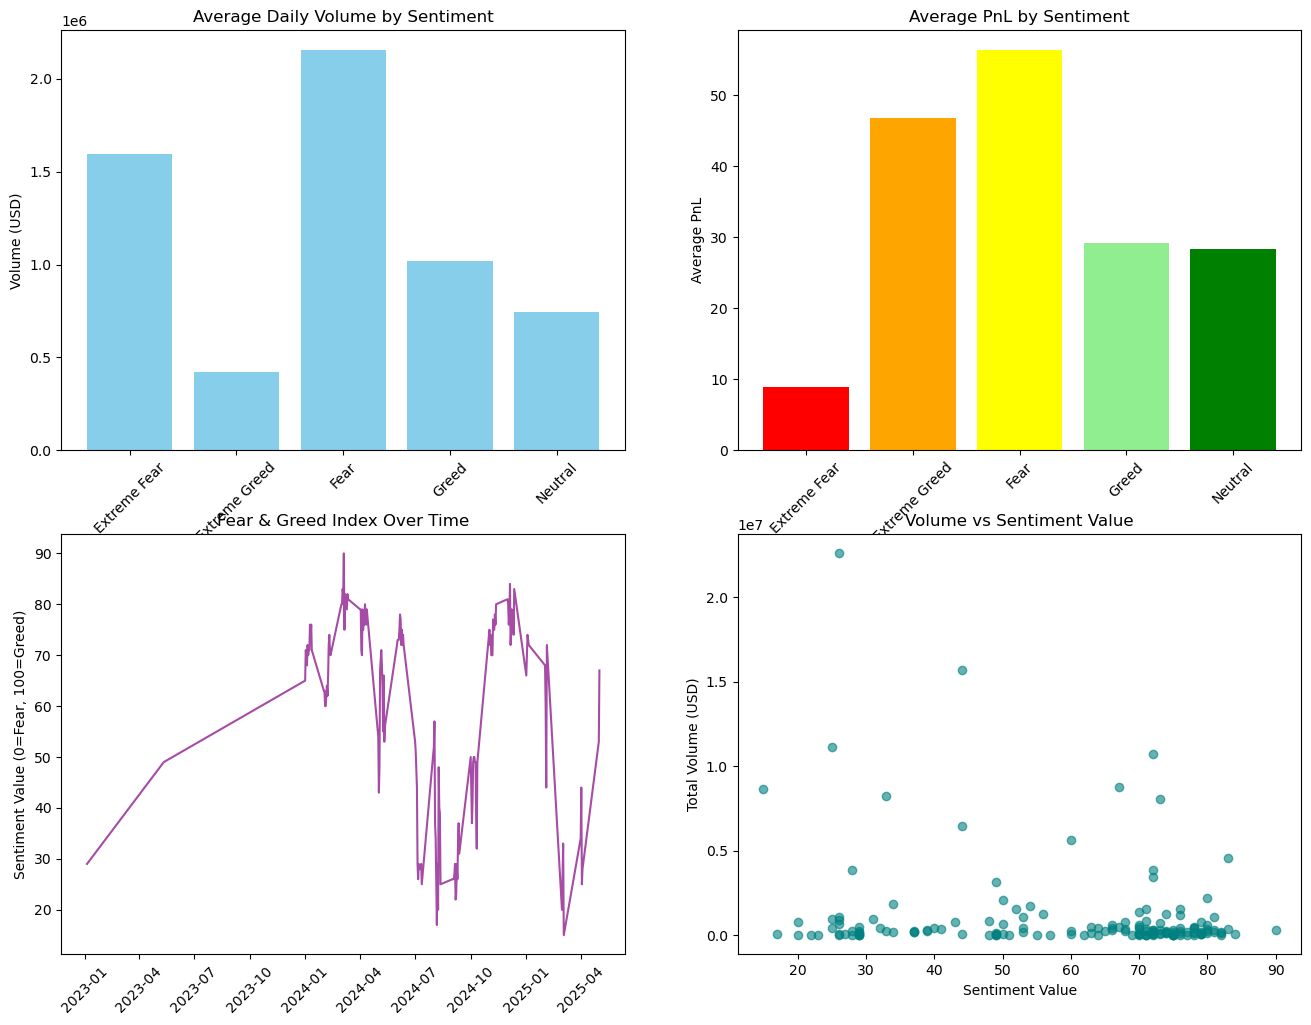

In [19]:
print("Exploratory Data Analysis")

# Create daily aggregated metrics
daily_metrics = df_merged.groupby(["Date","value","classification","sentiment_numeric"]).agg({
    "Size USD": ["sum", "mean", "count"],
    "Closed PnL": ["sum", "mean"],
    "Account": "nunique"
}).reset_index()

# Flatten column names
daily_metrics.columns = ["Date", "sentiment_value", "sentiment_class", "sentiment_numeric",
                        "total_volume", "avg_trade_size", "trade_count", 
                        "total_pnl", "avg_pnl", "unique_traders"]

print(f"Daily metrics created: {daily_metrics.shape[0]} days")

# 1. Basic Trading Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Volume by sentiment category
sentiment_volume = daily_metrics.groupby("sentiment_class")["total_volume"].mean()
axes[0, 0].bar(sentiment_volume.index, sentiment_volume.values, color="skyblue")
axes[0, 0].set_title("Average Daily Volume by Sentiment")
axes[0, 0].set_ylabel("Volume (USD)")
axes[0, 0].tick_params(axis="x", rotation=45)

# PnL by sentiment category
sentiment_pnl = daily_metrics.groupby("sentiment_class")["avg_pnl"].mean()
colors = ["red", "orange", "yellow", "lightgreen", "green"]
axes[0, 1].bar(sentiment_pnl.index, sentiment_pnl.values, color=colors[:len(sentiment_pnl)])
axes[0, 1].set_title("Average PnL by Sentiment")
axes[0, 1].set_ylabel("Average PnL")
axes[0, 1].tick_params(axis="x", rotation=45)

# Sentiment timeline
axes[1, 0].plot(daily_metrics["Date"], daily_metrics["sentiment_value"], alpha=0.7, color="purple")
axes[1, 0].set_title("Fear & Greed Index Over Time")
axes[1, 0].set_ylabel("Sentiment Value (0=Fear, 100=Greed)")
axes[1, 0].tick_params(axis="x", rotation=45)

# Volume vs Sentiment scatter

axes[1, 1].scatter(daily_metrics["sentiment_value"], daily_metrics["total_volume"], alpha=0.6, color="teal")
axes[1, 1].set_title("Volume vs Sentiment Value")
axes[1, 1].set_xlabel("Sentiment Value")
axes[1, 1].set_ylabel("Total Volume (USD)")